In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dt = pd.read_csv('merchants_train.csv', encoding='cp1251',sep=';')
tr = pd.read_csv('transactions.csv', encoding='cp1251',sep=',')

In [3]:
tr.head()

,merchant_id,latitude,longitude,real_transaction_dttm,record_date
0,178,0.000000,0.000000,9:34:47,9:30:36
1,178,55.055995,82.912991,17:49:50,17:54:24
2,178,0.000000,0.000000,9:34:47,9:31:22
3,178,55.056034,82.912734,17:49:50,17:43:01
4,178,55.056034,82.912734,17:49:50,17:45:17


> посмотрим на все данные и пометим прямоугольник в которых действительно был чекин:

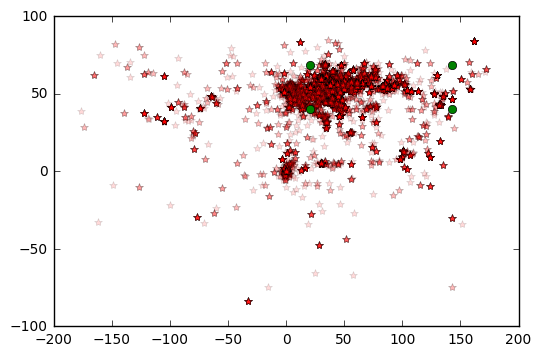

In [8]:
plt.plot(tr.longitude.values, tr.latitude.values,  '*r', alpha=0.15)
plt.plot(dt.longitude.max(), dt.latitude.max(), 'og')
plt.plot(dt.longitude.min(), dt.latitude.max(), 'og')
plt.plot(dt.longitude.max(), dt.latitude.min(), 'og')
plt.plot(dt.longitude.min(), dt.latitude.min(), 'og')

> очень шумные данные:

- большое скопление в нуле 
- много постороннего шума
- все трейновые реальные точки где-то в россии

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = tr[['longitude', 'latitude']]
X.shape

(249353, 2)

In [70]:
X = X.drop_duplicates()
X.shape

(76973, 2)

In [71]:
X = X.values

In [72]:
# как нибудь отфильтруем
X = X[(X[:,0]>0.4) & (X[:,0]<100) & (X[:,1]>30) & (X[:,1]<80)]
X.shape

(75342, 2)

In [ ]:
plt.plot(X[:, 0], X[:, 1],  '*r')

In [74]:
db = DBSCAN(eps=0.1, min_samples=5, metric='minkowski', p=2, n_jobs=1)
db.fit(X)
labels = db.labels_

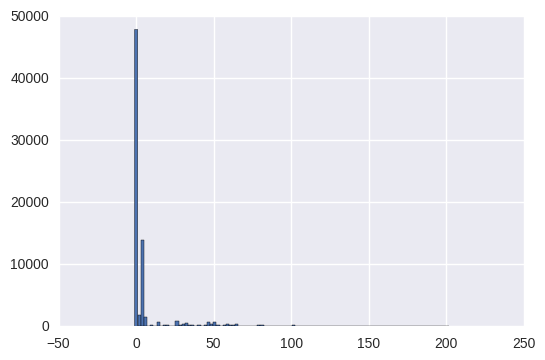

In [75]:
plt.hist(labels, bins=100);

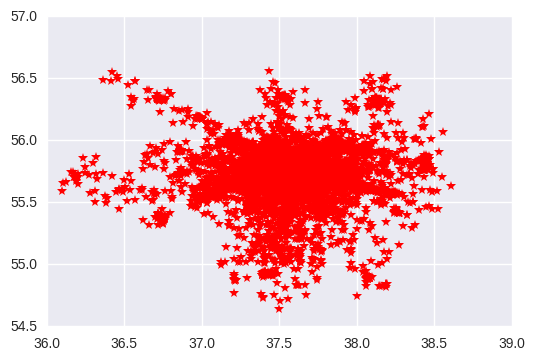

In [76]:
# создался кластер Москвы
plt.plot(X[labels==1, 0], X[labels==1, 1],  '*r')

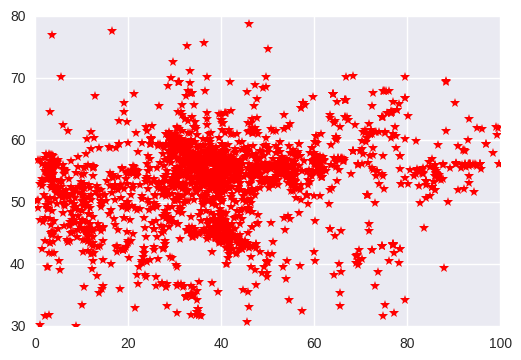

In [77]:
# кластер россии без москвы (там дырка! ¯\_(ツ)_/¯)
plt.plot(X[labels==-1, 0], X[labels==-1, 1],  '*r')

> на примере выше кластеризовалась москва. правда ли в шуме - центр москвы (типа случайно заполняются пропуски москвой)?

In [82]:
lat = tr.latitude.values
lon = tr.longitude.values

In [89]:
a,b = np.unique(lat, return_counts=True)
a[np.argsort(b)[::-1][:5]], b[np.argsort(b)[::-1][:5]]

(array([ 55.75034704,   0.        ,  51.17889992,  55.76595679,  55.750347  ]),
 array([28690, 25018,  5420,   642,   486]))

In [90]:
a,b = np.unique(lon, return_counts=True)
a[np.argsort(b)[::-1][:5]], b[np.argsort(b)[::-1][:5]]

(array([ 37.62385111,   0.        ,  -1.82639994,  37.6235111 ,  37.61596005]),
 array([27974, 25028,  5421,   722,   642]))

In [18]:
import numpy as np
dt[np.isclose(dt.latitude.values, 55.75034704, atol=1e-8, rtol=1e-6)]

,merchant_id,latitude,longitude
519,140238,55.750393,37.869505
5976,1021408,55.750393,37.869505


In [12]:
m = tr[(np.isclose(tr.latitude, [55.75034704], atol=1e-08) &
   np.isclose(tr.longitude, [37.62385111], atol=1e-08)) | 
      (np.isclose(tr.latitude, [0], atol=1e-08) &
   np.isclose(tr.longitude, [0], atol=1e-08))].merchant_id.unique()

In [14]:
tr[np.in1d(tr.merchant_id, m)].head(10)

,merchant_id,latitude,longitude,real_transaction_dttm,record_date
0,178,0.000000,0.000000,9:34:47,9:30:36
1,178,55.055995,82.912991,17:49:50,17:54:24
2,178,0.000000,0.000000,9:34:47,9:31:22
3,178,55.056034,82.912734,17:49:50,17:43:01
4,178,55.056034,82.912734,17:49:50,17:45:17
5,178,0.000000,0.000000,10:25:10,10:29:56
6,178,0.000000,0.000000,13:48:53,13:47:54
7,178,55.055995,82.912991,17:49:50,17:51:34
8,267,55.741642,37.502628,15:34:28,15:32:51
9,267,55.707007,37.582190,23:42:30,23:36:34


____

### Еще попробуем что нибудь

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

%matplotlib inline

dt = pd.read_csv('merchants_train.csv', encoding='cp1251',sep=';')
dt.columns = ['merchant_id', 'latitude_tr', 'longitude_tr']
tr = pd.read_csv('transactions.csv', encoding='cp1251',sep=',')

In [51]:
# бывают такие мерчатны, для которых мы ничего не сможем определить (кажется)
tr[tr.merchant_id==10919]

,merchant_id,latitude,longitude,real_transaction_dttm,record_date
3923,10919,0.0,0.0,8:16:26,8:15:34
3924,10919,0.0,0.0,12:07:26,12:06:59
3925,10919,0.0,0.0,19:06:48,19:04:22
3926,10919,0.0,0.0,12:07:26,12:06:23
3927,10919,0.0,0.0,19:06:48,19:05:07


In [ ]:
plt.plot(tr.longitude, tr.latitude, '.r', alpha=0.1)

In [4]:
# возьмем сторонних данных

a = pd.read_html('http://alextyurin.ru/?p=1037')

centres_of_cities = a[0].loc[3:92, ['Город', 'Широта', 'Долгода']]
centres_of_cities.columns = ['city',  'lat', 'lon']

In [145]:
centres_of_cities[centres_of_cities.city=='Москва']

,city,lat,lon
44,Москва,55.755773,37.617761


In [146]:
np.argsort(np.sqrt((centres_of_cities.lat.values.astype(float) - 55.0559) ** 2 + 
                   (centres_of_cities.lon.values.astype(float) - 82.91299) **2))

array([48,  4, 75, 28,  6, 56, 46,  0, 50, 35,  7, 49, 77,  9, 72, 27, 84,
       23, 20, 54, 45, 38, 78, 55, 80, 52, 22, 43, 61, 74, 24, 79, 83,  2,
        3, 86, 63, 39, 53, 15, 44, 18, 13, 71, 21, 33, 69, 14, 89, 60, 16,
       85, 37,  1, 70, 17, 58, 66, 65, 59, 68,  8, 25, 32, 34, 41, 76, 19,
       47,  5, 26, 36, 51, 82, 73, 88, 10, 30, 67, 12, 64, 42, 11, 81, 29,
       62, 31, 57, 40, 87])

In [ ]:
# построим дерево для быстрого поиска ближайшего города к чекину по координатам

a = pd.read_html('http://alextyurin.ru/?p=1037')

centres_of_cities = a[0].loc[3:92, ['Город', 'Широта', 'Долгода']]
centres_of_cities.columns = ['city',  'lat', 'lon']

from sklearn.neighbors import NearestNeighbors
centres_of_cities = centres_of_cities.reset_index()
nn = NearestNeighbors(n_neighbors=1, p=2, n_jobs=6)

nn.fit(centres_of_cities[[ 'lat', 'lon']].astype(float).values)

In [160]:
nn.kneighbors([55.056034, 82.912734])

/home/mount/neuro-t01-ssd/home/amir/my_env/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


(array([[ 0.02790567,  1.8947414 ]]), array([[48,  4]]))

In [161]:
nn.kneighbors([55.741642, 37.582190])

/home/mount/neuro-t01-ssd/home/amir/my_env/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


(array([[ 0.03827507,  0.32344302]]), array([[41, 25]]))

In [83]:
# TRAIN
# дропаю нули
# дубли тоже удаляю;
idx = ((tr.latitude > 0.) & (tr.latitude < 80.) & 
       np.invert(tr[['latitude', 'longitude']].duplicated()) &
       (tr.longitude > 0.) & (tr.longitude < 110.) )

sum(idx)

db = DBSCAN(eps=0.1, min_samples=5, metric='minkowski', p=1, n_jobs=1)
db.fit(tr.loc[idx, ['latitude', 'longitude']].values)
labels = db.labels_

76079

In [85]:
some_lbl = labels

In [86]:
u_c = np.unique(some_lbl, return_counts=True)
u_c[1][np.argsort(u_c[1])[-3:]]

array([ 3002, 13814, 44132])

In [87]:
some_lbl[np.argsort(np.unique(some_lbl, return_counts=True)[1])[-1]]

1

In [76]:
tr = tr.loc[idx].loc[some_lbl==1]

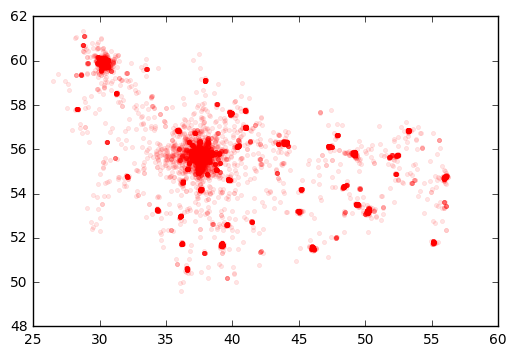

In [77]:
plt.plot( tr.longitude, tr.latitude, '.r', alpha=0.1)

In [78]:
tr.shape

(66006, 5)

In [79]:
tmp = tr.groupby('merchant_id').latitude.median().reset_index()
tmp.columns = ['merchant_id', 'latitude_pr']
tmp1 = tr.groupby('merchant_id').longitude.median().reset_index()
tmp1.columns = ['merchant_id', 'longitude_pr']
simple_ans_by_median = pd.merge(pd.merge(dt[['merchant_id']], tmp), tmp1)

simple_ans_by_median['ans'] = pd.merge(simple_ans_by_median, dt).\
                              apply(lambda x: 1 
                                    if (np.abs(x.latitude_pr - x.latitude_tr)<=0.002 and \
                                        np.abs(x.longitude_pr - x.longitude_tr)<=0.002) 
                                    else 0, axis=1)

In [80]:
print ('train acc =', simple_ans_by_median.ans.mean())

train acc = 0.275706214689


_______

## Эвристика бейзлайн - аккуратный ответ медианой по merchant

In [206]:
import pandas as pd
import numpy as np

In [207]:
dt = pd.read_csv('merchants_train.csv', encoding='cp1251',sep=';')
dt.columns = ['merchant_id', 'latitude_tr', 'longitude_tr']
tr = pd.read_csv('transactions.csv', encoding='cp1251',sep=',')

In [208]:
dt.head(2)

,merchant_id,latitude_tr,longitude_tr
0,178,55.055553,82.911833
1,267,55.726877,37.579645


In [209]:
tr.head(2)

,merchant_id,latitude,longitude,real_transaction_dttm,record_date
0,178,0.000000,0.000000,9:34:47,9:30:36
1,178,55.055995,82.912991,17:49:50,17:54:24


In [210]:
# TRAIN
# дропаю нули  
tr = tr[(tr.latitude > dt.latitude_tr.min()) & 
        (tr.latitude < dt.latitude_tr.max()) & 
        ~np.isclose(tr.latitude.values, 55.75034704, atol=1e-8)]
tr = tr[(tr.longitude > dt.longitude_tr.min()) & 
        (tr.longitude < dt.longitude_tr.max()) &
        ~np.isclose(tr.longitude.values, 37.62385111, atol=1e-8)]
# дубли тоже удаляю;
tr = tr[np.invert(tr[['merchant_id', 'latitude', 'longitude']].duplicated())]

tmp = tr.groupby('merchant_id').latitude.median().reset_index()
tmp.columns = ['merchant_id', 'latitude_pr']
tmp1 = tr.groupby('merchant_id').longitude.median().reset_index()
tmp1.columns = ['merchant_id', 'longitude_pr']
simple_ans_by_median = pd.merge(pd.merge(dt[['merchant_id']], tmp), tmp1)

# assert simple_ans_by_median.shape[0] == dt.shape[0]

simple_ans_by_median['ans'] = pd.merge(simple_ans_by_median, dt).\
                              apply(lambda x: 1 
                                    if (np.abs(x.latitude_pr - x.latitude_tr)<=0.002 and \
                                        np.abs(x.longitude_pr - x.longitude_tr)<=0.002) 
                                    else 0, axis=1)

In [211]:
simple_ans_by_median.head(2)

,merchant_id,latitude_pr,longitude_pr,ans
0,178,55.056015,82.912863,1
1,267,55.707007,37.580252,0


In [212]:
print ('train acc =', simple_ans_by_median.ans.mean())

train acc = 0.168759811617


### test submission

In [218]:
dt = pd.read_csv('merchants_test.csv', encoding='cp1251',sep=';')
dt.columns = ['merchant_id', 'latitude_tr', 'longitude_tr']
tr = pd.read_csv('transactions.csv', encoding='cp1251',sep=',')

# дропаю нули
tr = tr[(tr.latitude > 20.) & (tr.latitude < 100.)  & ~np.isclose(tr.latitude.values, 55.75034704, atol=1e-8)]
tr = tr[(tr.longitude > 10.) & (tr.longitude < 80.) & ~np.isclose(tr.longitude.values, 37.62385111, atol=1e-8)]


# дубли тоже удаляю;
tr = tr[np.invert(tr[['merchant_id', 'latitude', 'longitude']].duplicated())]

simple_ans_by_median = pd.merge(pd.merge(dt[['merchant_id']], 
                                tr.groupby('merchant_id').latitude.median().reset_index()),
                                tr.groupby('merchant_id').longitude.median().reset_index())

tmp = tr.groupby('merchant_id').latitude.median().reset_index()
tmp.columns = ['merchant_id', 'latitude_pr']
tmp1 = tr.groupby('merchant_id').longitude.median().reset_index()
tmp1.columns = ['merchant_id', 'longitude_pr']
simple_ans_by_median = pd.merge(pd.merge(dt[['merchant_id']], tmp), tmp1)

simple_ans_by_median['ans'] = pd.merge(simple_ans_by_median, dt).\
                              apply(lambda x: 1 
                                    if (np.abs(x.latitude_pr - x.latitude_tr)<=0.002 and \
                                        np.abs(x.longitude_pr - x.longitude_tr)<=0.002) 
                                    else 0, axis=1)

simple_ans_by_median.drop(['ans'], axis=1, inplace=True)
simple_ans_by_median.columns= ['_ID_','_LAT_','_LON_']

# assert simple_ans_by_median.shape[0] == dt.shape[0]

simple_ans_by_median.to_csv('baseline_ans_by_medians.csv', index=False)

simple_ans_by_median.head()

/home/mount/neuro-t01-ssd/home/amir/my_env/lib/python3.4/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in absolute


,_ID_,_LAT_,_LON_
0,361,56.825943,60.576447
1,428,55.690315,37.604719
2,490,59.875699,30.361785
3,1175,55.735251,37.593043
4,1239,55.800972,37.535740


In [217]:
dt.merchant_id.unique().shape[0]

3524

In [215]:
simple_ans_by_median._ID_.shape[0]

3396

_____

# ! GO TO ML !


Давайте заставим классификатор выбирать за нас точки, пока мы будем отдыхахать.

______

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from datetime import datetime
from sklearn.cross_validation import LabelShuffleSplit

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.max_columns = 100

xgb.__version__

/home/mount/neuro-t01-ssd/home/amir/my_env/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'0.6'

In [2]:
train_loc = pd.read_csv('merchants_train.csv', encoding='cp1251',sep=';')
train_loc.columns = ['merchant_id', 'latitude_tr', 'longitude_tr']
train_loc.head(2)

,merchant_id,latitude_tr,longitude_tr
0,178,55.055553,82.911833
1,267,55.726877,37.579645


In [3]:
lat_min = train_loc.latitude_tr.min()
lat_max = train_loc.latitude_tr.max()
lon_min = train_loc.longitude_tr.min()
lon_max = train_loc.longitude_tr.max()

In [4]:
test_loc = pd.read_csv('merchants_test.csv', encoding='cp1251',sep=';')
test_loc.head(2)

,merchant_id,latitude,longitude
0,361,NaN,NaN
1,428,NaN,NaN


In [5]:
transactions = pd.read_csv('transactions.csv', encoding='cp1251',sep=',')
transactions.head(2)

,merchant_id,latitude,longitude,real_transaction_dttm,record_date
0,178,0.000000,0.000000,9:34:47,9:30:36
1,178,55.055995,82.912991,17:49:50,17:54:24


In [6]:
def in_rectangle(x):
    if (np.abs(x['latitude_tr'] - x['latitude']) <= 0.002 and 
        np.abs(x['longitude_tr'] - x['longitude']) <= 0.002):
        ans = 1
    elif (x['longitude_tr'] == x['longitude_tr']):
        ans = 0
    else:
        ans = 'nan'
    return  ans


In [7]:
# посмотрим сколько измерений из чекинов трейна совпадают с ответом

tmp_data = pd.merge(transactions, train_loc, on='merchant_id')

tmp_data['target'] = tmp_data.apply(lambda x: in_rectangle(x), axis=1)

tmp_data.drop(['latitude_tr', 'longitude_tr'], axis=1, inplace=True)

tmp = tmp_data.groupby('merchant_id')['target'].max()
del tmp_data
print(sum(tmp == 1) * 1.0 / len(tmp), u'% observations contains right coord.')

0.47192224622 % observations contains right coord.


> Если мы будем брать в качестве ответа только точки чекинов, то лучшее возможное решение - это 0.47 (исходя из трейна). Для 53% мерчантов все точки находятся не в прямоугольнике ±0.002

In [8]:
# MAKE TARGET

# заделаем таргет
## _____
## будем предсказывать вероятность того что чекин будет лежать в прямоугольнике
## потом cv по мерчантам и чекин для максимальной вероятности.
### (хотя можно заделать таргетом расстояние до мерчанта и делать регрессию)
## _____

tr = transactions.copy()
# дубли удаляю;
tr = tr[np.invert(tr[['merchant_id', 'latitude', 'longitude']].duplicated())]

data = pd.merge(train_loc, tr, on = 'merchant_id', how='outer')

data['target'] = data.apply(lambda x: in_rectangle(x), axis=1)

data = data.drop(['latitude_tr', 'longitude_tr'], axis=1)
del tr

/home/mount/neuro-t01-ssd/home/amir/my_env/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in absolute
  from ipykernel import kernelapp as app


In [9]:
# DROP дропаю нули только в трейне
drop_idx = data[(data.target!='nan') & 
                (
                    (data.latitude > 100) &
                    (data.latitude < 0.1) &
                    (data.longitude > 80) &
                    (data.longitude < 0.1) &
                    np.isclose(data.latitude, [55.75034704], atol=1e-08) & 
                    np.isclose(data.longitude, [37.62385111], atol=1e-08)
                )].index
data = data.drop(drop_idx, axis=0)


# drop_idx = data[(data.target!='nan') & 
#                 ((data.latitude < train_loc.latitude_tr.min()) | 
#                 (data.latitude > train_loc.latitude_tr.max()) | 
#                 (data.longitude < train_loc.longitude_tr.min()) | 
#                 (data.latitude > train_loc.longitude_tr.max()))
#                ].index
# data = data.drop(drop_idx, axis=0)

In [10]:
# TEST проверим не потеряли ли тест
assert np.all(np.in1d(data[data.target=='nan'].merchant_id.unique(), 
                      test_loc.merchant_id.values))
assert np.all(np.in1d(test_loc.merchant_id.values, 
                      data[data.target=='nan'].merchant_id.unique()))

In [11]:
data.shape

(131797, 6)

In [12]:
# DIV разделим на трейн и тест
data_test = data[data.target=='nan']
data_train = data[data.target!='nan']
del data

In [13]:
# ASSERT
assert np.all(np.in1d(data_test.merchant_id.unique(), test_loc.merchant_id.values))
assert np.all(np.in1d(test_loc.merchant_id.values, data_test.merchant_id.unique()))
print ('вроде норм')

вроде норм


In [14]:
data_train.shape, data_test.shape

((87088, 6), (44709, 6))

In [15]:
data_train.head(3)

,merchant_id,latitude,longitude,real_transaction_dttm,record_date,target
0,178,0.000000,0.000000,9:34:47,9:30:36,0
1,178,55.055995,82.912991,17:49:50,17:54:24,1
2,178,55.056034,82.912734,17:49:50,17:43:01,1


In [16]:
data_test.head(3)

,merchant_id,latitude,longitude,real_transaction_dttm,record_date,target
87088,361,56.827622,60.581082,21:00:31,20:59:27,nan
87089,361,55.750347,37.623851,12:08:07,12:03:12,nan
87090,361,55.750347,37.623511,11:23:24,11:29:16,nan


## features

____

In [17]:
def is_trash(tr, ts):
    cols = ['latitude', 'longitude']
    tr_data = tr[cols].values
    ts_data = ts[cols].values
    
    # выброс ли точка - центр москвы
    is_mosk = (np.isclose(tr_data[:, 0], [55.75034704], atol=1e-08) & 
               np.isclose(tr_data[:, 1], [37.62385111], atol=1e-08)) 
    
    is_mosk1 = (np.isclose(ts_data[:, 0], [55.75034704], atol=1e-08) & 
                np.isclose(ts_data[:, 1], [37.62385111], atol=1e-08))
    
    #не в эвристическом на глаз прямоугольнике
    idx = ((tr_data[:, 0] > 10) & (tr_data[:, 0]  < 80.) & 
            (tr_data[:, 1]  > 20) & (tr_data[:, 1] < 110.))
    
    idx1 = ((ts_data[:, 0] > 10) & (ts_data[:, 0]  < 80.) & 
            (ts_data[:, 1]  > 20) & (ts_data[:, 1] < 110.))
    
    tr_data = tr.copy()
    ts_data = ts.copy()
    
    is_in = ((tr_data.latitude > lat_min) & 
             (tr_data.latitude < lat_max) & 
             (tr_data.longitude > lon_min) & 
             (tr_data.longitude < lon_max))
    
    is_in1 = ((ts_data.latitude > lat_min) & 
              (ts_data.latitude < lat_max) & 
              (ts_data.longitude > lon_min) & 
              (ts_data.longitude < lon_max))
    
    tr_data['is_in_rec'] = is_in.astype(int)
    ts_data['is_in_rec'] = is_in1.astype(int)
    
    tr_data['is_trash'] = 1 - idx.astype(int)
    ts_data['is_trash'] = 1 - idx1.astype(int)
    
    tr_data['is_mosk'] = is_mosk.astype(int)
    ts_data['is_mosk'] = is_mosk1.astype(int)
    
    return tr_data, ts_data

In [18]:
from sklearn.neighbors import NearestNeighbors

a = pd.read_html('http://alextyurin.ru/?p=1037')
centres_of_cities = a[0].loc[3:92, ['Город', 'Широта', 'Долгода']]
centres_of_cities.columns = ['city',  'lat', 'lon']
centres_of_cities = centres_of_cities.reset_index()
nn = NearestNeighbors(n_neighbors=1, p=2, n_jobs=6)
nn.fit(centres_of_cities[[ 'lat', 'lon']].astype(float).values)

def get_nearest_city(tr, ts):
    """
    Used additional data  - coordinates of cities centers.
    """
    tr_data = tr.copy()
    ts_data = ts.copy()
    cols = ['latitude', 'longitude']
    
    dt = pd.concat([tr_data[cols], ts_data[cols]], axis=0)
    a = nn.kneighbors(dt[cols].values)[1].flatten()
    dist = nn.kneighbors(dt[cols].values)[0].flatten()
    b,c = np.unique(a, return_counts=True)
    maper = {k:v for k,v in zip(b, c)}
    a = list(map(lambda x: maper[x], a))
    tr_data['city_count_enc'] = a[:tr_data.shape[0]]
    ts_data['city_count_enc'] = a[-ts_data.shape[0]:]
#     tr_data['city_dist'] = dist[:tr_data.shape[0]]
#     ts_data['city_dist'] = dist[-ts_data.shape[0]:]
    return tr_data, ts_data

In [19]:
def get_time_features(dt):
    """
    Work with time.
    """
    tr = dt.copy()
    tr['H_trans'] = tr.real_transaction_dttm.str.split(':').apply(lambda x: int(x[0]))
    tr['M_trans'] = tr.real_transaction_dttm.str.split(':').apply(lambda x: int(x[1]))
    tr['S_trans'] = tr.real_transaction_dttm.str.split(':').apply(lambda x: int(x[2]))

    tr['H_rec'] = tr.record_date.str.split(':').apply(lambda x:  int(x[0]))
    tr['M_rec'] = tr.record_date.str.split(':').apply(lambda x:  int(x[1]))
    tr['S_rec'] = tr.record_date.str.split(':').apply(lambda x:  int(x[2]))
    
    tr['time_delta'] =  ((tr['H_trans'] * 3600 + tr['M_trans'] * 60 + tr['S_trans']) - 
                               (tr['H_rec'] * 3600 + tr['M_rec'] * 60 + tr['S_rec']))
    
    tr['time_log_delta'] = np.log(np.abs(tr['time_delta']) + 1)
    
    tr['time1'] = tr['H_trans'] * 60 + tr['M_trans']
    tr['time2'] = tr['H_rec'] * 60 + tr['M_rec']
    
    # time std 
    tmp = tr.groupby('merchant_id').time_log_delta.std().reset_index()
    tmp.columns = ['merchant_id', 'delta_std']
    tmp = pd.merge(tmp, tr, how='outer', on='merchant_id')
    tr['time_std_delta'] = tmp.delta_std.values
    tr.set_value(tr['time_std_delta'] != tr['time_std_delta'], 'time_std_delta', -1)
    
    # time1 dist to mean & median
    tmp = tr.groupby('merchant_id').time1.mean().reset_index()
    tmp.columns = ['merchant_id', 't1_mean']
    tmp = pd.merge(tmp, tr, how='outer', on='merchant_id')
    tr['time_dist_to_mean_1'] = np.abs(tr.time1.values - tmp.t1_mean.values)
    #
    tmp = tr.groupby('merchant_id').time1.median().reset_index()
    tmp.columns = ['merchant_id', 't1_median']
    tmp = pd.merge(tmp, tr, how='outer', on='merchant_id')
    tr['time_dist_to_median_1'] = np.abs(tr.time1.values - tmp.t1_median.values)    
    
    # time2 dist to mean & median
    tmp = tr.groupby('merchant_id').time2.mean().reset_index()
    tmp.columns = ['merchant_id', 't2_mean']
    tmp = pd.merge(tmp, tr, how='outer', on='merchant_id')
    tr['time_dist_to_mean_2'] = np.abs(tr.time2.values - tmp.t2_mean.values)
    #
    tmp = tr.groupby('merchant_id').time2.median().reset_index()
    tmp.columns = ['merchant_id', 't2_median']
    tmp = pd.merge(tmp, tr, how='outer', on='merchant_id')
    tr['time_dist_to_median_2'] = np.abs(tr.time2.values - tmp.t2_median.values)
    

    tr.drop(['real_transaction_dttm', 'record_date',
             'H_trans', 'M_trans', 'S_trans',
             'H_rec', 'M_rec', 'S_rec'], axis=1, inplace=True)
    
    return tr

In [20]:
def in_merchant_dist_features(data):
    """
    Some aggreg features for nearest neighbors like:
    - TODO ? should i add some noise - for avoiding one id leak?
    -
    """
    dt = data.copy()
    #std lat & lon
    tmp = dt.groupby('merchant_id').latitude.std().reset_index()
    tmp.columns = ['merchant_id', 'dist_lat_std']
    dt = pd.merge(dt, tmp, how='outer', on='merchant_id')
    tmp = dt.groupby('merchant_id').longitude.std().reset_index()
    tmp.columns = ['merchant_id', 'dist_lon_std']
    dt = pd.merge(dt, tmp, how='outer', on='merchant_id')
    dt.set_value(dt['dist_lat_std'] != dt['dist_lat_std'], 'dist_lat_std', -1)
    dt.set_value(dt['dist_lon_std'] != dt['dist_lon_std'], 'dist_lon_std', -1)
    
    #dist to mean and to median
    tmp = dt.groupby('merchant_id').latitude.mean().reset_index()
    tmp.columns = ['merchant_id', 'lat_mean']
    tmp = pd.merge(tmp, dt, how='outer', on='merchant_id')
    dt['dist_to_mean_lat'] = np.abs(dt.latitude.values - tmp.lat_mean.values)
    #
    tmp = dt.groupby('merchant_id').latitude.median().reset_index()
    tmp.columns = ['merchant_id', 'lat_median']
    tmp = pd.merge(tmp, dt, how='outer', on='merchant_id')
    dt['dist_to_median_lat'] = np.abs(dt.latitude.values - tmp.lat_median.values)
    #
    tmp = dt.groupby('merchant_id').longitude.mean().reset_index()
    tmp.columns = ['merchant_id', 'lon_mean']
    tmp = pd.merge(tmp, dt, how='outer', on='merchant_id')
    dt['dist_to_mean_lon'] = np.abs(dt.longitude.values - tmp.lon_mean.values)
    #
    tmp = dt.groupby('merchant_id').longitude.median().reset_index()
    tmp.columns = ['merchant_id', 'lon_median']
    tmp = pd.merge(tmp, dt, how='outer', on='merchant_id')
    dt['dist_to_median_lon'] = np.abs(dt.longitude.values - tmp.lon_median.values)
    
    return dt

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Example%
# X = StandardScaler().fit_transform(X)
# db = DBSCAN(eps=0.003, min_samples=5, metric='minkowski', p=1)
# db.fit(data[['latitude','longitude']])
# db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# labels = db.labels_
#

def claster_features(train, test):
    """
    Return DBSCAN resulting label  for clusters:
    - by coordinates
    - clear data with evristics and clustering by coords. outlyers = -1
    - by time
    - by dist to mean / median.
    """
    tr = train.copy()
    ts = test.copy()
    
    cols = ['latitude', 'longitude']
    X_ts = np.vstack([tr[cols].values, 
                      ts[cols].values])
    print ('___cluster_ lat,lon')
#     X_tr = StandardScaler().fit_transform(X_tr)
#     X_ts = StandardScaler().fit_transform(X_ts)
    not_use = -100 * (np.isclose(X_ts[:, 0], [55.75034704], atol=1e-8) &
               np.isclose(X_ts[:, 1], [37.62385111], atol=1e-8)).astype(int)

    db = DBSCAN(eps=0.0015, min_samples=2, metric='minkowski', p=1, n_jobs=8).fit(X_ts)
    tr['labels_lat_lon'] = db.labels_[:tr.shape[0]] + not_use[:tr.shape[0]]
    ts['labels_lat_lon'] = db.labels_[-ts.shape[0]:]+ not_use[-ts.shape[0]:]
    db = DBSCAN(eps=0.05, min_samples=2, metric='minkowski', p=2, n_jobs=1).fit(X_ts)
    tr['labels_lat_lon_2'] = db.labels_[:tr.shape[0]] + not_use[:tr.shape[0]]
    ts['labels_lat_lon_2'] = db.labels_[-ts.shape[0]:]+ not_use[-ts.shape[0]:]
    
    
    # _________ шлак
    # TRAIN
    # дропаю нули
    # дубли тоже удаляю;
    X_ts = np.vstack([tr[cols].values, 
                      ts[cols].values])
    # 37.62385111, 55.75034704 (lat)
    idx = ((X_ts[:, 0] > 0.) & 
           (X_ts[:, 0]  < 80.) & 
           ~np.isclose(X_ts[:, 0], [55.75034704], atol=1e-8) &
            np.invert(pd.concat([tr[cols], ts[cols]], axis=0).duplicated()) &
            (X_ts[:, 1]  > 0.) & 
           (X_ts[:, 1] < 110.) &
            ~np.isclose(X_ts[:, 1], [37.62385111], atol=1e-8) )
    
    print ('___cluster_ shlack')
    db = DBSCAN(eps=0.8, min_samples=5, metric='minkowski', p=1, n_jobs=1)
    db.fit(X_ts[idx])
    labels = db.labels_
    # counter _ encoding
    b,c = np.unique(labels, return_counts=True)
    maper = {k:v for k,v in zip(b, c)}
    labels = list(map(lambda x: maper[x], labels))
    
    tr['labels_shlack'] = -1
    ts['labels_shlack'] = -1

    tr.set_value(idx[:tr.shape[0]], 'labels_shlack', labels[:tr['labels_shlack'].loc[idx[:tr.shape[0]]].shape[0]])
    ts.set_value(idx[-ts.shape[0]:], 'labels_shlack', labels[-ts['labels_shlack'].loc[idx[-ts.shape[0]:]].shape[0]:])
    
    ## TODO
    ## принадлежит ли наблюдение тому кластеру которое многочисленное ? 
    ## сколько наблюдений этого мерчанта еще лежат в этом кластере
    ## сколько в других мерчантах ?
    
    ## TODO 
    ## one-hot
    # TODO _ LABELS TO ONE_HOT
    print ('___cluster_ time')
    cols = ts.head().filter(like='time').columns.values
    X_ts = np.vstack([tr[cols].values, 
                      ts[cols].values])
    
    X_ts = MinMaxScaler().fit_transform(X_ts)
    db = DBSCAN(eps=0.1, min_samples=2, metric='minkowski', p=1, n_jobs=8).fit(X_ts)
    tr['labels_time_0.1'] = db.labels_[:tr.shape[0]]
    ts['labels_time_0.1'] = db.labels_[-ts.shape[0]:]
    db = DBSCAN(eps=0.3, min_samples=2, metric='minkowski', p=1, n_jobs=8).fit(X_ts)
    tr['labels_time_0.3'] = db.labels_[:tr.shape[0]]
    ts['labels_time_0.3'] = db.labels_[-ts.shape[0]:]
    db = DBSCAN(eps=0.05, min_samples=2, metric='minkowski', p=1, n_jobs=8).fit(X_ts)
    tr['labels_time_0.05'] = db.labels_[:tr.shape[0]]
    ts['labels_time_0.05'] = db.labels_[-ts.shape[0]:]
    
    
    cols = tr.head().filter(like='dist').columns.values
    X_ts = np.vstack([tr[cols].values, 
                      ts[cols].values])
    
    X_ts = MinMaxScaler().fit_transform(X_ts)
    db = DBSCAN(eps=0.1, min_samples=2, metric='minkowski', p=2, n_jobs=8).fit(X_ts)
    tr['labels_dist_0.1'] = db.labels_[:tr.shape[0]]
    ts['labels_dist_0.1'] = db.labels_[-ts.shape[0]:]
    db = DBSCAN(eps=0.3, min_samples=2, metric='minkowski', p=1, n_jobs=8).fit(X_ts)
    tr['labels_dist_0.3'] = db.labels_[:tr.shape[0]]
    ts['labels_dist_0.3'] = db.labels_[-ts.shape[0]:]
    
    
    #raise Exception('labels - one-hot encoder') 
    
    return (tr, ts)

In [ ]:
# # Прокси тутор для Васи
# #
# # Скачай файл с прокси серверами отсюда:
#     # http://proxy-fresh.ru/proxy/in-appearance/

# import requests
# from user_agent import generate_user_agent

# prox = []
# with open('some proxy.txt', 'r') as f:
#     prox = f.readlines()
    
# proxies_list = [{'http':'http://'+i.strip()} for i in prox]

# for i in tqdm(range(len(proxies_list))):
#     assert 200 == requests.get('http://yandex.ru', 
#                                headers={'User-Agent': generate_user_agent()},
#                                proxies=proxies_list[i]).status_code
# print ('all_proxies_are_worked!\n\n')


# # затем отмеряй 1999 запросов для каждой прокси и выкидывай ее из списка
# # должно помочь 

In [ ]:
# # запрос к опенстритмапс с помощью геокодера.

# # https://pypi.python.org/pypi/geopy/1.11.0
# from geopy.geocoders import Nominatim
# from time import sleep
# from tqdm import *

# geolocator = Nominatim()
# # location = geolocator.reverse("55.750347, 37.623851")
# # location.raw
# from sklearn.preprocessing import LabelEncoder
# label_enc = LabelEncoder()

# def geo_features(tr, train_data = True):
#     """
#     """
#     dt = tr.copy()
#     is_house = []
#     is_road = []
#     osm_type = []
#     is_point = []
    
#     for i in tqdm(range(dt.shape[0])):
#         q = dt.iloc[i]
#         query = str(q.latitude)+', '+str(q.longitude)
#         sleep(np.random.random())
#         location = geolocator.reverse(query)
#         is_house.append('house_number' in location.raw['address'].keys())
#         is_road.append('road' in location.raw['address'].keys())
#         osm_type.append(location.raw['osm_type'])
#         p = (np.allclose(float(location.raw['boundingbox'][0]),
#                         float(location.raw['boundingbox'][1])) and
#                         np.allclose(float(location.raw['boundingbox'][2]),
#                                     float(location.raw['boundingbox'][3])))
#         is_point.append(p)

#     if train_data:
#         osm_type = label_enc.fit_transform(osm_type)
#     else:
#         osm_type = label_enc.transform(osm_type)
#     dt['is_house'] = np.array(is_house).astype(int)
#     dt['is_road'] = np.array(is_road).astype(int)
#     dt['osm_type'] = osm_type
#     dt['is_point'] = np.array(is_point).astype(int)
#     return dt
    

### Тот же самый запрос, но руками, напрямую и с проксисерверов и параллелированный

In [ ]:
# from tqdm import *
# import requests
# from user_agent import generate_user_agent
# from bs4 import BeautifulSoup

# # http://proxy-fresh.ru/proxy/in-appearance/
# prox = []
# with open('proxy.txt', 'r') as f:
#     prox = f.readlines()

# proxies_list = [{'http':'http://'+i.strip()} for i in prox]

# for i in tqdm(range(len(proxies_list))):
#     assert 200 == requests.get('http://yandex.ru', 
#                                headers={'User-Agent': generate_user_agent()},
#                                proxies=proxies_list[i]).status_code
# print ('all_proxies_are_worked!\n\n')

# print (len(proxies_list))

# def get_proxy():
#     return proxies_list[np.random.randint(0, len(proxies_list))]

# def my_locator(query):
#     BASE_REVERSE_SEARCH = 'https://nominatim.openstreetmap.org/reverse.php'
#     lat, lon = query
#     sleep(np.random.random()*0.01)
#     req = requests.get(BASE_REVERSE_SEARCH, 
#                    params={'lat':lat, 'lon':lon, 'format':'json'},
#                    headers={'User-Agent': generate_user_agent()},
#                    proxies=get_proxy())
#     if req.status_code == 200:
#         return req.json()
#     else:
#         print ('error')
#         return {'address':{"1":0}}



# from sklearn.externals.joblib import Parallel, delayed

# quers = zip(data_train.latitude.values, data_train.longitude.values)
# res_tr = Parallel(n_jobs=8, backend='multiprocessing', verbose=6)(
#     delayed(my_locator)(query) for query in quers)

# quers = zip(data_test.latitude.values, data_test.longitude.values)
# res_ts = Parallel(n_jobs=8, backend='multiprocessing', verbose=7)(
#     delayed(my_locator)(query) for query in quers)

In [ ]:
# def geo_features(tr, train_data = True):
#     """
#     Some features from openstreetmap:
#     is_house, is_house, is_point (for knowing pos return rectangle coord) 
#     and others.
#     """
#     dt = tr.copy()
#     is_house = []
#     is_road = []
#     osm_type = []
#     is_point = []
    
#     map(, zip(dt.latitude.values, dt.longitude.values))
    
#     for i in tqdm(range(dt.shape[0])):
#         q = dt.iloc[i]
#         query = (q.latitude, q.longitude)
#         location = my_locator(query)
#         is_house.append('house_number' in location['address'].keys())
#         is_road.append('road' in location['address'].keys())
#         osm_type.append(location['osm_type'])
#         p = (np.allclose(float(location['boundingbox'][0]),
#                         float(location['boundingbox'][1])) and
#                         np.allclose(float(location['boundingbox'][2]),
#                                     float(location['boundingbox'][3])))
#         is_point.append(p)

#     if train_data:
#         osm_type = label_enc.fit_transform(osm_type)
#     else:
#         osm_type = label_enc.transform(osm_type)
#     dt['is_house'] = np.array(is_house).astype(int)
#     dt['is_house'] = np.array(is_road).astype(int)
#     dt['osm_type'] = osm_type
#     dt['is_point'] = np.array(is_point).astype(int)
#     return dt

In [ ]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(radius=0.002, p=1, n_jobs=8)
sc = StandardScaler()


def NN_features(train, is_train = True):
    """
    Some aggreg features for nearest neighbors like:
    - Distances to nearest neighbours
    - Sum of distances of 2 nearest neighbours
    - mean in 5 nearest obs
    - Sum of distances of 4 nearest neighbours
    - mean in 10 neares obs
    - center of mass of 5 neighbors (among eq 1)
    -
    """
    tr = train.copy()
    X = tr[['latitude', 'longitude', 'delta_in_seconds', 'labels']].values
    if is_train:
        X = sc.fit_transform(X)
        nn.fit(X)
    else:
        X = sc.transform(X)
        nn.transform(X)
    
    return None

###### Не успел затестисть фичи c соседями, а должны были помочь! 

##### Testing on working!

_____

# OK! make_tain_test_again!

In [22]:
def prepr_data(train, test):
    """
    Generating features in train & test datasets:
    - DBSCAN clustering labels;
    - GeoPosition describes;
    - Neighbors aggregated features.
    """
    
    print ('get_label_for_trash')
    train, test = is_trash(train, test)
    
    print ('nearest_city')
    train, test = get_nearest_city(train, test)
    
    print ('time')
    train = get_time_features(train)
    test = get_time_features(test)
    
#     train = geo_features(train, train_data = True)
#     test = geo_features(test, train_data = False)
    
    print ('dist')
    train = in_merchant_dist_features(train)
    test = in_merchant_dist_features(test)
    
    print ('cluster')
    train, test = claster_features(train, test)
    
    #NN_features
    #
    
    print ('go!')
    y_tr = train.target
    y_ts = test.target
    
    return (train.drop(['target'], axis=1), test.drop(['target'], axis=1), y_tr, y_ts)

In [23]:
tr, ts, y_tr, y_ts = prepr_data(data_train.head(50), data_test.head(50))

print ('TEST! ')

get_label_for_trash
nearest_city
time
dist
cluster
___cluster_ lat,lon
___cluster_ shlack
___cluster_ time
go!
TEST! 


In [24]:
cols = tr.head().filter(like='time').columns.values
cols

array(['time_delta', 'time_log_delta', 'time1', 'time2', 'time_std_delta',
       'time_dist_to_mean_1', 'time_dist_to_median_1',
       'time_dist_to_mean_2', 'time_dist_to_median_2', 'labels_time_0.1',
       'labels_time_0.3', 'labels_time_0.05'], dtype=object)

In [25]:
tr.tail()

,merchant_id,latitude,longitude,is_in_rec,is_trash,is_mosk,city_count_enc,time_delta,time_log_delta,time1,time2,time_std_delta,time_dist_to_mean_1,time_dist_to_median_1,time_dist_to_mean_2,time_dist_to_median_2,dist_lat_std,dist_lon_std,dist_to_mean_lat,dist_to_median_lat,dist_to_mean_lon,dist_to_median_lon,labels_lat_lon,labels_lat_lon_2,labels_shlack,labels_time_0.1,labels_time_0.3,labels_time_0.05,labels_dist_0.1,labels_dist_0.3
45,505,64.554149,40.554496,1,0,0,18,-161,5.087596,1192,1195,1.531281,201.608696,131.0,267.521739,162,13.681797,12.653609,4.091174,0.005666,3.126565,0.011785,-1,5,18,-1,3,-1,-1,-1
46,532,49.962226,46.446985,1,0,0,1,231,5.446737,1263,1259,1.260768,229.750000,248.5,226.750000,244,27.052031,24.186022,9.591791,2.893874,10.221285,1.385243,-1,-1,13,-1,11,-1,-1,-1
47,532,55.749975,49.238346,1,0,0,2,-201,5.308268,1002,1005,1.260768,31.250000,12.5,27.250000,10,27.052031,24.186022,15.379540,2.893874,13.012646,1.406119,-1,6,-1,-1,12,-1,-1,-1
48,532,0.000000,0.000000,0,1,0,9,79,4.382027,1027,1025,1.260768,6.250000,12.5,7.250000,10,27.052031,24.186022,40.370435,52.856100,36.225700,47.832227,0,0,-1,-1,12,-1,-1,-1
49,532,55.769538,49.217470,1,0,0,2,14,2.708050,841,840,1.260768,192.250000,173.5,192.250000,175,27.052031,24.186022,15.399104,2.913438,12.991770,1.385243,-1,6,13,-1,-1,-1,-1,-1


In [26]:
ts.head(5)

,merchant_id,latitude,longitude,is_in_rec,is_trash,is_mosk,city_count_enc,time_delta,time_log_delta,time1,time2,time_std_delta,time_dist_to_mean_1,time_dist_to_median_1,time_dist_to_mean_2,time_dist_to_median_2,dist_lat_std,dist_lon_std,dist_to_mean_lat,dist_to_median_lat,dist_to_mean_lon,dist_to_median_lon,labels_lat_lon,labels_lat_lon_2,labels_shlack,labels_time_0.1,labels_time_0.3,labels_time_0.05,labels_dist_0.1,labels_dist_0.3
0,361,56.827622,60.581082,1,0,0,11,64,4.174387,1260,1259,0.637183,465.411765,518.0,465.470588,513.0,13.748502,21.323447,3.889498,0.005525,3.801884,0.009271,-1,7,11,-1,-1,-1,-1,8
1,361,55.750347,37.623851,1,0,1,40,295,5.690359,728,723,0.637183,66.588235,14.0,70.529412,23.0,13.748502,21.323447,2.812223,1.071750,19.155347,22.947960,-98,-98,-1,-1,13,-1,10,10
2,361,55.750347,37.623511,1,0,1,40,-352,5.866468,683,689,0.637183,111.588235,59.0,104.529412,57.0,13.748502,21.323447,2.812223,1.071750,19.155687,22.948300,-98,-98,-1,3,13,-1,10,10
3,361,56.824988,60.675723,1,0,0,11,401,5.996452,971,965,0.637183,176.411765,229.0,171.470588,219.0,13.748502,21.323447,3.886864,0.002891,3.896525,0.103912,-1,8,11,-1,-1,-1,-1,11
4,361,56.807831,60.611228,1,0,0,11,-89,4.499810,657,658,0.637183,137.588235,85.0,135.529412,88.0,13.748502,21.323447,3.869707,0.014266,3.832030,0.039417,-1,7,11,-1,14,-1,11,11


In [27]:
tr.shape[0], ts.shape[0]

(50, 50)

In [28]:
not_ = ['merchant_id', 'latitude', 'longitude',]

In [29]:
xgb_params = {
    'objective': 'binary:logistic',
    'max_depth': 10,
    'gamma': 0.0,
    'eval_metric': 'logloss',
    'eta': 0.01,
    'booster': 'gbtree',
    'seed': 1,
    'alpha': 0.1,
    'lambda': 1.0,
    'colsample_bytree': 0.95,
    'subsample': 0.95,
    'min_child_weight': 1,
    'silent': 1,
    'nthread': 10,
}

num_rounds = 900

### CV

In [ ]:
cv = LabelShuffleSplit(data_train.merchant_id.values, n_iter=5, test_size=0.3, random_state=0)

score = []

for train_idx, test_idx in cv:
    
    X_tr, X_ts, y_train, y_test = prepr_data(data_train.iloc[train_idx], 
                                             data_train.iloc[test_idx])
    
    
    dtrain = xgb.DMatrix((X_tr.drop(not_, axis=1).values), label=y_train, 
                         feature_names=X_tr.head().drop(not_, axis=1).columns)
    
    dtest = xgb.DMatrix((X_ts.drop(not_, axis=1).values), label=y_test, 
                        feature_names=X_tr.head().drop(not_, axis=1).columns)
    
    watchlist = [(dtrain, 'train'), (dtest, 'eval')]
    gbdt = xgb.train(xgb_params, dtrain,
                     num_rounds, watchlist,
                     early_stopping_rounds=None,
                     verbose_eval=150,)
                     #evals_result=eval_res[-1])
    
    plt.figure()
    xgb.plot_importance(gbdt)
    
    ans = X_ts[['merchant_id', 'latitude', 'longitude']].copy()
    ans['probs'] = gbdt.predict(dtest)
    ans['pred_ans'] = 0
    ans = ans.reset_index()
    idx = ans.groupby('merchant_id')['probs'].apply(np.argmax).reset_index()['probs']
    ans.loc[idx, 'pred_ans'] = 1 # тут предикшн готов.
    
    ans['real'] = y_test
   
    score.append(ans[ans.pred_ans==1].real.mean())
    print (score[-1])
print (np.mean(score), '±', np.std(score))

In [37]:
print (np.mean(score), '±', np.std(score))

0.296452442159 ± 0.01090943935


### Prepare Submission

In [ ]:
%%time

X_tr, X_ts, y_train, y_test = prepr_data(data_train, data_test)

dtrain = xgb.DMatrix(X_tr.drop(not_, axis=1).values, label=y_train, 
                     feature_names=X_tr.drop(not_, axis=1).columns)

dtest = xgb.DMatrix(X_ts.drop(not_, axis=1).values, feature_names=X_tr.drop(not_, axis=1).columns)

gbdt = xgb.train(xgb_params, dtrain,
                 num_rounds,
                 early_stopping_rounds=None)

ans = X_ts[['merchant_id', 'latitude', 'longitude']].copy()
ans['probs'] = gbdt.predict(dtest)
ans['pred_ans'] = 0
ans = ans.reset_index()
idx = ans.groupby('merchant_id')['probs'].apply(np.argmax).reset_index()['probs']
ans.loc[idx, 'pred_ans'] = 1 # тут предикшн готов.


In [ ]:
ans = ans[ans.pred_ans==1][['merchant_id','latitude', 'longitude']]

In [ ]:
assert ans.shape[0] == len(data_test.merchant_id.unique())

In [ ]:
ans.columns= ['_ID_','_LAT_','_LON_']
ans.to_csv('ans_pred_xgb_'+str(datetime.now())[:19]+'_.csv', index=False)

In [38]:
ans.head()

,_ID_,_LAT_,_LON_
0,361,56.827622,60.581082
20,428,55.690315,37.604719
23,490,59.875699,30.361785
40,1175,55.743663,37.565374
49,1239,55.800972,37.543166


In [ ]:
# TODO

- удалять нули из тестовой выборки - если там есть другие записи кроме нулей

- почистить хорошенько выбросы и разные популярные координаты

- посмотреть глазами
 
- данные из трейна которые не этого мерчанта - посмотреть сколько в окрестности

In [ ]:
Стырил но так и не попробовал

-Feature 1: Distances to nearest neighbours of each classes
-Feature 2: Sum of distances of 2 nearest neighbours of each classes
-Feature 3: Sum of distances of 4 nearest neighbours of each classes
-Feature 4: Distances to nearest neighbours of each classes in TFIDF space
-Feature 5: Distances to nearest neighbours of each classed in T-SNE space (3 dimensions)
-Feature 6: Clustering features of original dataset
-Feature 7: Number of non-zeros elements in each row


-Model 22: KNN on features X + int(X == 0)
-Model 23: KNN on features X + int(X == 0) + log(X + 1)
-Model 24: KNN on raw with 2 neighbours
-Model 25: KNN on raw with 4 neighbours
-Model 26: KNN on raw with 8 neighbours
-Model 27: KNN on raw with 16 neighbours
-Model 28: KNN on raw with 32 neighbours
-Model 29: KNN on raw with 64 neighbours
-Model 30: KNN on raw with 128 neighbours
-Model 31: KNN on raw with 256 neighbours
-Model 32: KNN on raw with 512 neighbours

первый уровень - модели и признаки
второй уровень модели
третий уровень смесь моделей 

я еще никогда так не делал


Probably the main insight was that KNN is capable of making very good metafeatures. 
Never underestimate nearest neighbours algorithm.

http://blog.kaggle.com/2015/06/09/otto-product-classification-winners-interview-2nd-place-alexander-guschin/

